In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
df1 = sns.load_dataset('tips')

In [3]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
data = pd.crosstab(df1['sex'],df1['tip'])

QUESTION : Create a bar graph in asc order of median of day wise tips given by female bill payers

In [30]:
a = df1.groupby(['day']).sum()
a

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [46]:
df1.groupby(['sex','day'])['tip'].median()

sex     day 
Male    Thur    2.530
        Fri     2.600
        Sat     3.000
        Sun     3.085
Female  Thur    2.005
        Fri     3.000
        Sat     2.625
        Sun     3.500
Name: tip, dtype: float64

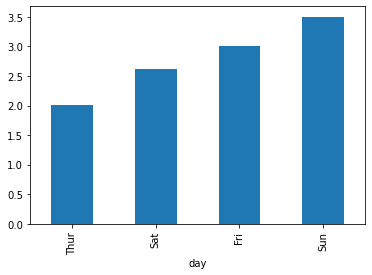

In [43]:
df1.groupby(['sex','day'])['tip'].median()['Female'].sort_values().plot(kind='bar');

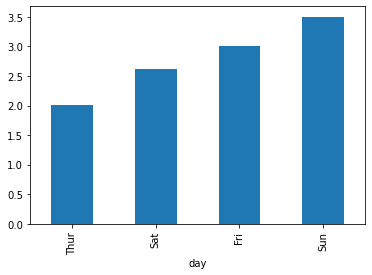

In [51]:
# alternative solution
df1.pivot_table(index = 'day',columns='sex',values = 'tip',aggfunc='median')['Female'].sort_values().plot(kind='bar');

QUESTION : Create a bar graph for average bill payed by male and female smokers in desc order

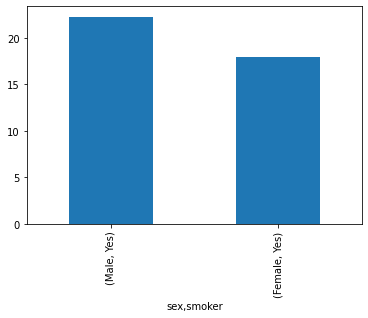

In [62]:
# beating round the bush
df1.groupby(['sex','smoker'])['total_bill'].mean()[0::2].sort_values(ascending=False).plot(kind='bar');

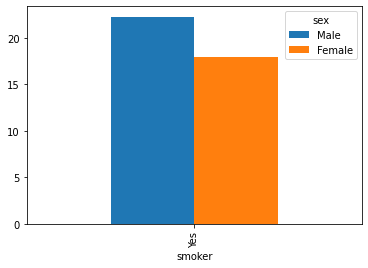

In [69]:
# # beating round the bush
df1.pivot_table(index = 'smoker',columns='sex',values = 'total_bill' )[0:1].plot(kind='bar');

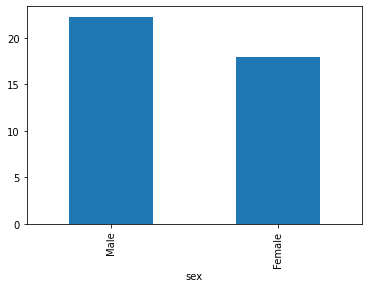

In [77]:
# correct answer
df1.groupby(['smoker','sex'])['total_bill'].mean()['Yes'].sort_values(ascending=False).plot(kind='bar');

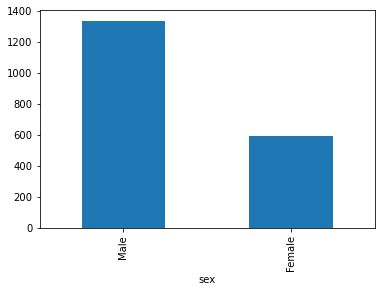

In [79]:
df1.pivot_table(index = 'sex',columns='smoker',values = 'total_bill',aggfunc='sum' )['Yes'].plot(kind='bar');

In [76]:
# NOTEEEEEEEE ::: if u want a column of specified criteria then put that column as first in groupby so
# u could retrieve using [''] after the aggregate function

# eg: Q1 :only female => df1.groupby(['sex','day'])['tip'].median()['Female']
# eg : Q2 :only smokers => df1.groupby(['smoker','sex'])['total_bill'].mean()['Yes']


# NOTEEEEEEEE ::: if u want a column of specified criteria then put that column as columns in 
# pivot_table so u could retrieve using [''] after the aggregate function

# eg: Q1 :only female => df1.pivot_table(index = 'day',columns='sex',values = 'tip',aggfunc='median')['Female']
# eg : Q2 :only smokers => df1.pivot_table(index = 'sex',columns='smoker',values = 'total_bill',aggfunc='sum' )['Yes']

In [80]:
df1['sex_le'] = df1['sex'].replace({'Female':0,'Male':1})

In [81]:
df1

,total_bill,tip,sex,smoker,day,time,size,sex_le
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [82]:
# using map to replace
df1['sex_le1'] = df1['sex'].map({'Female':0,'Male':1})

In [83]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,sex_le,sex_le1
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
LE = LabelEncoder()

In [86]:
df1['day_le'] = LE.fit_transform(df1['day'])

In [87]:
df1

,total_bill,tip,sex,smoker,day,time,size,sex_le,sex_le1,day_le
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1,1


In [88]:
df1['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [89]:
df1['day_le'].value_counts()

1    87
2    76
3    62
0    19
Name: day_le, dtype: int64

In [91]:
# ONE HOT ENCODING

pd.get_dummies(df1['sex']).head()

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [96]:
pd.get_dummies(df1,columns = ['day'])

,total_bill,tip,sex,smoker,time,size,sex_le,sex_le1,day_le,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,1,1,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,1,1,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,1,1,0,0,1,0


In [97]:
pd.get_dummies(df1,columns = ['day','sex','smoker'])

,total_bill,tip,time,size,sex_le,sex_le1,day_le,day_Thur,day_Fri,day_Sat,day_Sun,sex_Male,sex_Female,smoker_Yes,smoker_No
0,16.99,1.01,Dinner,2,0,0,2,0,0,0,1,0,1,0,1
1,10.34,1.66,Dinner,3,1,1,2,0,0,0,1,1,0,0,1
2,21.01,3.50,Dinner,3,1,1,2,0,0,0,1,1,0,0,1
3,23.68,3.31,Dinner,2,1,1,2,0,0,0,1,1,0,0,1
4,24.59,3.61,Dinner,4,0,0,2,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Dinner,3,1,1,1,0,0,1,0,1,0,0,1
240,27.18,2.00,Dinner,2,0,0,1,0,0,1,0,0,1,1,0
241,22.67,2.00,Dinner,2,1,1,1,0,0,1,0,1,0,1,0
242,17.82,1.75,Dinner,2,1,1,1,0,0,1,0,1,0,0,1


In [98]:
# remove thursday
pd.get_dummies(df1,columns = ['day'],drop_first=True)

,total_bill,tip,sex,smoker,time,size,sex_le,sex_le1,day_le,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,2,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,1,1,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,1,1,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,1,1,0,1,0


In [ ]:
# 